In [1]:
from tensorflow import keras
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import  datasets
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
#Convert the labels into one-hot codes.
num_classes = 10
y_test1=y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
#Normalize image pixel values.
x_train = x_train/255
x_test = x_test/255

In [7]:
model = keras.Sequential()
    # The first two layers with 32 filters of window size 3x3
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

     


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

In [8]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=['accuracy']) 
#model.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=50,batch_size=128,shuffle='true',validation_data=(x_test, y_test))



Epoch 1/50
391/391 [==============================] - 18s 14ms/step - loss: 1.7712 - accuracy: 0.3315 - val_loss: 1.3991 - val_accuracy: 0.4880
Epoch 2/50
391/391 [==============================] - 5s 12ms/step - loss: 1.3444 - accuracy: 0.5136 - val_loss: 1.1967 - val_accuracy: 0.5720
Epoch 3/50
391/391 [==============================] - 5s 13ms/step - loss: 1.1593 - accuracy: 0.5868 - val_loss: 1.0573 - val_accuracy: 0.6227
Epoch 4/50
391/391 [==============================] - 5s 12ms/step - loss: 1.0399 - accuracy: 0.6299 - val_loss: 0.9226 - val_accuracy: 0.6711
Epoch 5/50
391/391 [==============================] - 5s 12ms/step - loss: 0.9488 - accuracy: 0.6649 - val_loss: 0.8466 - val_accuracy: 0.7012
Epoch 6/50
391/391 [==============================] - 5s 12ms/step - loss: 0.8800 - accuracy: 0.6903 - val_loss: 0.7825 - val_accuracy: 0.7244
Epoch 7/50
391/391 [==============================] - 5s 13ms/step - loss: 0.8213 - accuracy: 0.7113 - val_loss: 0.8107 - val_accuracy: 0.720

In [9]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5552 - accuracy: 0.8210


In [10]:
y_pred=model.predict(x_test)
y_pred.shape

(10000, 10)

In [11]:
import numpy as np
from numpy import argmax
y_pred1=argmax(y_pred,axis=1)

print(y_pred[10])

print(y_pred1[10])



[5.8079654e-01 3.2076816e-04 1.6236685e-01 3.8115222e-02 1.2860717e-01
 1.4506729e-02 2.9735840e-03 1.5796149e-02 5.5257957e-02 1.2590521e-03]
0


In [12]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(y_test1,y_pred1))
accuracy_score(y_test1,y_pred1)*100

[[847  13  22  11  10   0   6  12  52  27]
 [  6 915   0   2   2   1   5   0  14  55]
 [ 64   1 667  56  67  45  61  24   9   6]
 [ 21   4  29 680  46 110  47  23  20  20]
 [ 13   1  26  42 812  20  44  34   4   4]
 [  9   5  22 132  26 746  18  30   6   6]
 [ 10   3  24  47  18  12 872   2  10   2]
 [  9   1  10  29  42  31   4 863   4   7]
 [ 41  18   4   5   2   1   7   0 900  22]
 [ 18  35   3   8   0   0   5   2  21 908]]


82.1

[5]
[4.7650889e-07 5.8341902e-07 1.0302679e-03 2.0677014e-01 3.5185192e-05
 7.9111677e-01 8.6277294e-05 9.5999608e-04 2.1986310e-07 1.5192856e-07]
5


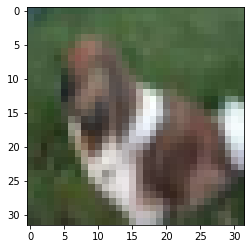

In [13]:
plt.imshow(x_test[502],cmap="gray")

print(y_test1[502])
print(y_pred[502])
print(y_pred1[502])

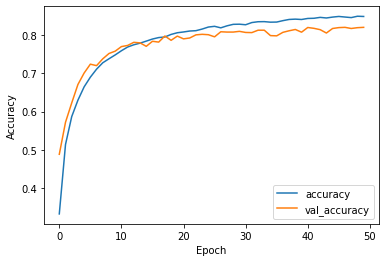

In [14]:
plt.plot(results.history['accuracy'], label='accuracy')
plt.plot(results.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')



Text(0, 0.5, 'Training losses')

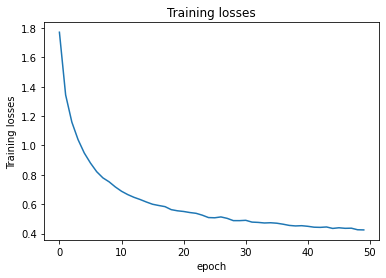

In [18]:
plt.plot(results.history['loss'])
plt.title('Training losses')
plt.xlabel('epoch')
plt.ylabel('Training losses')

Text(0.5, 0, 'epoch')

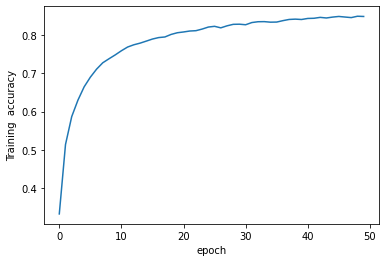

In [16]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.ylabel('Training  accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

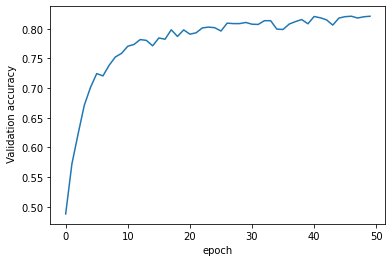

In [17]:
import matplotlib.pyplot as plt
plt.plot(results.history['val_accuracy'])
plt.ylabel(' Validation accuracy')
plt.xlabel('epoch')